# Python Open Labs: Visualizing data with pandas

## Setup

With this Google Colaboratory (Colab) notebook open, click the "Copy to Drive" button that appears in the menu bar. The notebook will then be attached to your own user account, so you can edit it in any way you like -- you can even take notes directly in the notebook.

## Instructors

- Walt Gurley
- Claire Cahoon

## Open Labs agenda

1. **Guided activity**: One of the instructors will share their screen to work through the guided activity and teach concepts along the way.

2. **Open lab time**: After the guided portion of the Open Lab, the rest of the time is for you to ask questions, work collaboratively, or have self-guided practice time. You will have access to instructors and peers for questions and support.

Breakout rooms will be available if you would like to work in small groups. If you have trouble joining a room, ask in the chat to be moved into a room.

## Learning objectives

By the end of our workshop today, we hope you'll understand basic methods for exploring data with pandas and the visualization library matplotlib and have an awareness of other Python visualization libraries.

## Today's Topics

- TODO

## Questions during the workshop

Please feel free to ask questions throughout the workshop.

We have a second instructor who will available during the workshop. They will answer as able, and will collect questions with answers that might help everyone to be answered at the end of the workshop.

The open lab time is when you will be able to ask more questions and work together on the exercises.

## Guided Instruction

In this Open Lab we're introducing how to use the pandas library with the visualization library matplotlib and other visualization libraries for exploring data.

In this section, we will work through examples using data from the [Museum of Modern Art (MoMA) research dataset](https://github.com/MuseumofModernArt/collection) containing records of all of the works that have been cataloged in the database of the MoMA collection.

> "The Museum’s website features 89,695 artworks from 26,494 artists. This research dataset contains 138,151 records, representing all of the works that have been accessioned into MoMA’s collection and cataloged in our database. It includes basic metadata for each work, including title, artist, date made, medium, dimensions, and date acquired by the Museum. Some of these records have incomplete information and are noted as “not Curator Approved." - [MoMA Github repository for collection data](https://github.com/MuseumofModernArt/collection)

We have prepared a dataset to use in the following activities that consists of MoMA artworks classified as paintings, artist information for each painting, and additional variables generated for exploring the dataset. We will be referencing the data that we have prepared in our [Github repository for teaching datasets](https://github.com/ncsu-libraries-data-vis/teaching-datasets/tree/main/moma_data).

In [1]:
# Import the Pandas library as pd (callable in our code as pd)
import pandas as pd

### Load the dataset

In [2]:
# Import the cleaned MoMA paintings with artist information dataset (CSV file)
# The file location
file_url = 'https://raw.githubusercontent.com/ncsu-libraries-data-vis/teaching-datasets/main/moma_data/moma_paintings_final.csv'

# Read in the file and print out the DataFrame
paintings = pd.read_csv(file_url)
paintings

,Title,Artist,ConstituentID,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,...,ArtistBio,Nationality,Gender,BeginDate,EndDate,Area (cm^2),Aspect,OilPainting,YearCreated,AspectString
0,"Rope and People, I",Joan Miró,4016.0,"Barcelona, March 27, 1935","Oil on cardboard mounted on wood, with coil of...","41 1/4 x 29 3/8"" (104.8 x 74.6 cm)",Gift of the Pierre Matisse Gallery,71.1936,Painting,Painting & Sculpture,...,"Spanish, 1893–1983",Spanish,male,1893.0,1983.0,7818.080000,0.711832,Y,1935.0,Portrait
1,Fire in the Evening,Paul Klee,3130.0,1929,Oil on cardboard,"13 3/8 x 13 1/4"" (33.8 x 33.3 cm)",Mr. and Mrs. Joachim Jean Aberbach Fund,153.1970,Painting,Painting & Sculpture,...,"German, born Switzerland. 1879–1940",German,male,1879.0,1940.0,1125.540000,0.985207,Y,1929.0,Portrait
2,Portrait of an Equilibrist,Paul Klee,3130.0,1927,Oil and collage on cardboard over wood with pa...,"24 7/8 x 15 3/4"" (63.2 x 40 cm)",Mrs. Simon Guggenheim Fund,195.1966,Painting,Painting & Sculpture,...,"German, born Switzerland. 1879–1940",German,male,1879.0,1940.0,2219.040000,0.610282,Y,1927.0,Portrait
3,Guitar,Pablo Picasso,4609.0,"Paris, early 1919","Oil, charcoal and pinned paper on canvas","7' 1"" x 31"" (216 x 78.8 cm)",Gift of A. Conger Goodyear,384.1955,Painting,Painting & Sculpture,...,"Spanish, 1881–1973",Spanish,male,1881.0,1973.0,16991.330000,0.364521,Y,1919.0,Portrait
4,Grandmother,Arthur Dove,1602.0,1925,"Shingles, needlepoint, page from Concordance, ...","20 x 21 1/4"" (50.8 x 54.0 cm)",Gift of Philip L. Goodwin (by exchange),636.1939,Painting,Painting & Sculpture,...,"American, 1880–1946",American,male,1880.0,1946.0,2743.200000,1.062992,N,1925.0,Landscape
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,Zacimba Gaba,Dalton Paula,132719.0,2020,"Oil, pencil, and gold leaf on two joined canvases","24 × 17 3/4"" (61 × 45.1 cm), in two parts",NaN,TR16514.1,Painting,Painting & Sculpture,...,"Brazilian, born 1982",Brazilian,NaN,1982.0,0.0,2748.392594,0.739583,Y,2020.0,Portrait
2346,Zumbi,Dalton Paula,132719.0,2020,"Oil, pencil, and gold leaf on two joined canvases","24 × 17 3/4"" (61 × 45.1 cm), in two parts",NaN,TR16514.2,Painting,Painting & Sculpture,...,"Brazilian, born 1982",Brazilian,NaN,1982.0,0.0,2748.392594,0.739583,Y,2020.0,Portrait
2347,Vertigo #2,Ouattara Watts,132954.0,2011,"Acrylic, paper pulp, cut and pasted fabrics, a...","118 1/4 × 165 1/2 × 3 3/4"" (300.4 × 420.4 × 9....",NaN,TR16516,Painting,Painting & Sculpture,...,"American, born Ivory Coast, 1957",American,NaN,1957.0,0.0,126260.736392,1.399577,N,2011.0,Landscape
2348,Lot 111113 (flare 1),Donald Moffett,7435.0,2013,Acrylic and lacquer on linen with cotton and a...,"54 × 44"" (137.2 × 111.8 cm)",NaN,TR16517,Painting,Painting & Sculpture,...,"American, born 1955",American,male,1955.0,0.0,15329.062916,0.814815,N,2013.0,Portrait


### The pandas plot method

Plotting data with pandas can be accomplished using the `plot()` method available on both `Series` and `DataFrame` objects. By default, when calling the `plot()` method pandas creates a `line` plot, assuming the data referenced for the plot is numeric. By default, pandas uses the Python visualization library `matplotlib` as the plotting backend for the `plot()` method.

We will explore the results of calling `plot()` on the entire `paintings` DataFrame and one column, `Area (cm^2)`, from our DataFrame (a Series).

<AxesSubplot:>

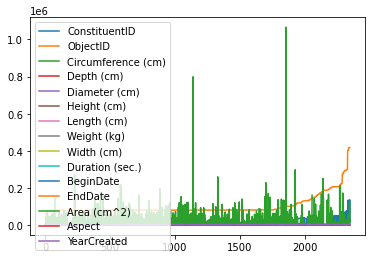

In [3]:
# Call the plot() method on the entire paintings DataFrame
paintings.plot()

<AxesSubplot:>

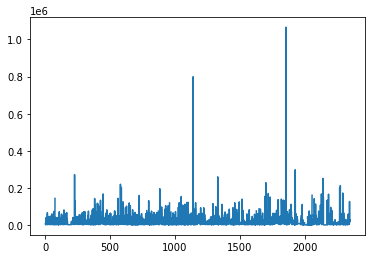

In [4]:
# Call the plot() method on the column "Area (cm^2)"
paintings['Area (cm^2)'].plot()

### Other plot methods using pandas `plot`

Beyond the default line plot provided by the `plot()` method, pandas provides several other plotting methods to create other types of plots such as bar plots, scatter plots, and histograms (here is [a full list of pandas plot methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#other-plots)).

To create a different type of plot we use the general syntax `DataFrame.plot.<kind>`, where `<kind>` is the type of plot you want to create. Typically, the most difficult part of creating a plot is getting the data in the correct form for the type of plot being used. We will often use various filtering, aggregation, or grouping methods prior to creating a plot to prepare the data for plotting.

We will demonstrate the pandas plotting methods `hist()`, `bar()` and `barh()`, and `scatter()` by exploring the `paintings` DataFrame data.

#### Histograms

A great way to begin exploring a variable is to analyze the distribution of the observations.

We will use the `hist()` plot method to create a histogram and view the distribution of the year in which a painting was created (column labeled `YearCreated`)

<AxesSubplot:ylabel='Frequency'>

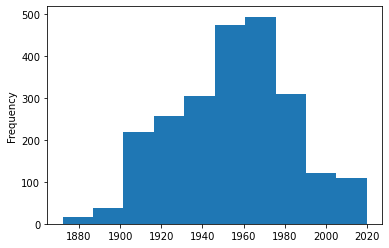

In [5]:
# Create a histogram plot of the values in the column "YearCreated"
paintings['YearCreated'].plot.hist()

Each plot method has specified keyword arguments that can be passed into the method call to set various parameters of a plot. For example, we can pass a value to the parameter `bins` to set the number of bins to use in a histogram.

<AxesSubplot:ylabel='Frequency'>

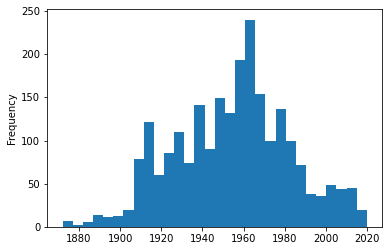

In [6]:
# Create a histogram plot of the values in the column "YearCreated" with 30 bins
paintings['YearCreated'].plot.hist(bins=30)

#### Bar plots

Bar charts are useful for comparing observations of a variable between different categories of data. For example, it may be interesting to observe the number of paintings in the MoMA collection based on gender or nationality.

We will use bar plot methods (`bar()` and `barh()`) to explore the number of paintings created by artists by gender and nationality. This will require some reformatting of the data using DataFrame methods such as `value_counts()` and filtering. We will also implement some of the keyword arguments used with these methods.

<AxesSubplot:>

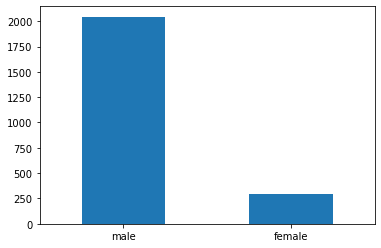

In [8]:
# Create a bar plot comparing the total number of paintings by gender
paintings['Gender'].value_counts().plot.bar(rot=0)

<AxesSubplot:>

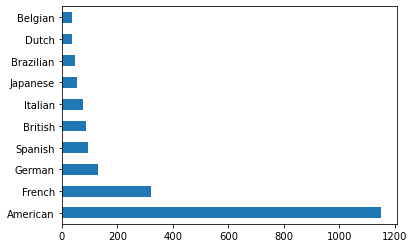

In [11]:
# Create a pandas Series of the value counts of paintings by "Nationality"
# filtered to only include the ten nationalities with the most paintings
top_nationalities = paintings['Nationality'].value_counts().iloc[:10]

# Create a horizontal bar plot of the number of paintings each of the ten
# most represented nationalities has in the collection
top_nationalities.plot.barh()

#### Scatter plots

Scatter plots are useful for comparing relationships between two, or more, variables. For example, one way to observe general trends in the aspect ratio of the paintings is to plot each painting as a point by its width (on the horizontal axis) and height (on the vertical axis). The position at which the points lie on the plot will give us a general idea of whether more paintings are tall, square, or wide.

We will create a scatter plot of the width (`Width (cm)`) against the height (`Height (cm)`) of a subset of the `paintings` DataFrame that includes only paintings with a total size of less than or equal to 10m<sup>2</sup>

<AxesSubplot:xlabel='Width (cm)', ylabel='Height (cm)'>

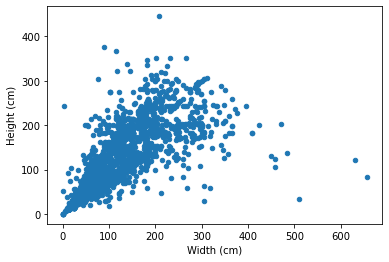

In [13]:
# Create a new DataFrame consisting of only paintings smaller than 10 m^2
# ("Area (cm^2) < 100000")
small_paintings = paintings[paintings['Area (cm^2)'] <= 100000]

# Create a scatter plot of the new DataFrame, plotting "Width (cm)" on the
# horizontal axis and "Height (cm)" on the vertical axis
small_paintings.plot.scatter(x='Width (cm)', y='Height (cm)')

### Styling plots

Often it is useful to edit some of the default stylings of a plot such as the plot size or marker colors or add additional styles such as labels and titles. Styles can be set at the global level, applying to all plots created in a notebook, and set at the single plot level.

#### Setting global plot styles

Global style parameters for all plots can be set using the matplotlib pyplot interface. This allows us to do things like set a standard figure size, change default styles, or use a [predefined style sheet](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html) to style all the plots in our notebook.

We must first import the `pyplot` interface from the `matplotlib` library–it is standard to use the alias `plt`. For example: `from matplotlib import pyplot as plt`

In [12]:
# Import the matplotlib pyplot interface as plt (callable in our code as plt)
from matplotlib import pyplot as plt

After importing `pyplot` we will use the method `plt.style.use()` to set [the global style of our plots using a predefined style sheet](https://matplotlib.org/stable/tutorials/introductory/customizing.html) based on the popular R graphing library ggplot. This method takes one argument, the string name of a predefined style sheet or a path to a user defined style sheet. We are using the predefined ggplot style sheet, so we will pass in the string `ggplot`.

<AxesSubplot:>

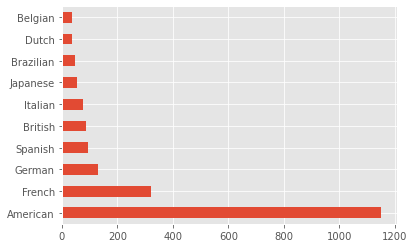

In [14]:
# Set the default graphic style of plots in the notebook to 'ggplot'
plt.style.use('ggplot')

# Recreate a horizontal bar plot of the number of paintings each of the ten
# most represented nationalities has in the collection with the new global style
top_nationalities.plot.barh()

#### Set the style of the plot

Specific plot styles can be set by passing various keyword arguments into the plot method you are using. There are some style properties that are universal for all plot types (for example, the color of a symbol, the size of the figure, etc.), while some style properties are specific to certain plot types (for example, the shape of a scatter plot point).

We will recreate the previous horizontal bar chart and demonstrate how to set the color (`color='hotpink'`), outline (`edgecolor='purple'`), and hatching (`hatch='//'`) of a the bar symbols and the size of the plot (`figsize=[8, 6]`) using style keyword arguments.

<AxesSubplot:>

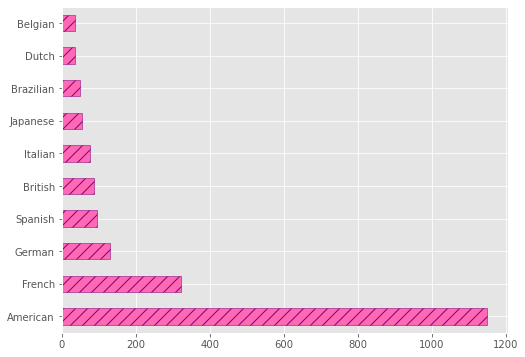

In [15]:
# Recreate a horizontal bar plot of the number of paintings each of the ten
# most represented nationalities has in the collection using style keyword
# arguments
top_nationalities.plot.barh(color='hotpink', edgecolor='purple', hatch='//', figsize=[8, 6])

To make our chart more descriptive and easy to interperet, we can set the plot title and axis labels. We will store our plot as a matplotlib `Axes` object in a variable by calling the `plot.barh()` method. We can then call the methods `set_title()`, `set_xlabel()`, and `set_ylabel()` on this variable to set a descriptive title, x axis label, and y axis label, respectively.

Note that you can also set these labels in the `plot()` method using keyword arguments (e.g., `xlabel`, `ylabel`, `title`) similar to the previous way in which we set style parameters.

Text(0, 0.5, 'Nationality')

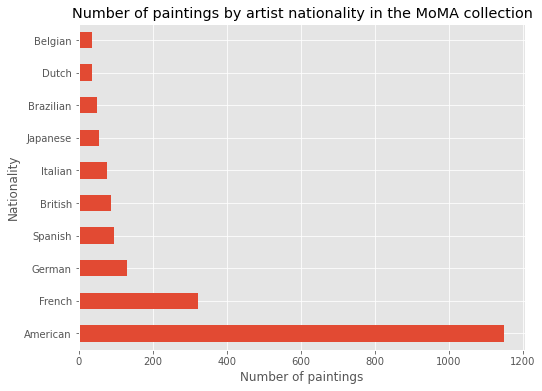

In [16]:
# Create a variable that stores the plot
top_nationalities_plot = top_nationalities.plot.barh(figsize=[8, 6])

# Change titles and axis labels with set_title(), set_xlabel(), and set_ylabel()
top_nationalities_plot.set_title("Number of paintings by artist nationality in the MoMA collection")
top_nationalities_plot.set_xlabel("Number of paintings")
top_nationalities_plot.set_ylabel("Nationality")

#### Saving a plot

`matplotlib` provides functionality for saving a figure as an image using the method `savefig()`. We need to get the figure from our plot by calling `get_figure` on the matplotlib `Axes` object and then calling the method `savefig()`.

In [ ]:
# Save the top nationalities plot as a png
top_nationalities_plot.get_figure().savefig('test.png')

# Save a high resolution version of the plot by setting a high dpi
top_nationalities_plot.get_figure().savefig('test_hr.png', dpi=300)

# Save a vectorized version of the plot (svg)
top_nationalities_plot.get_figure().savefig('test_hr.svg')

### Other plotting libraries

There are many other Python visualization libraries beyond `matplotlib`. Depending on your visualization needs, there are libraries that offer additional features such as advanced plot types, enhanced styling options, the ability to plot large datasets, and interactivity. We will introduce two popular plotting libraries, **Seaborn** and **Altair**, that provide additional functionality while also working well with pandas data structures.

You can find an exhaustive overview of Python visualization tools on the [PyViz website](https://pyviz.org/index.html).

#### Seaborn

Seaborn is a "Matplotlib-based high-level interface for drawing statistical graphics." Seaborn builds upon the functionality of matplotlib and provides more robust options. You can learn more and find documentation on the [seaborn website](https://seaborn.pydata.org/)

In [17]:
# Import the Seaborn library as sns (callable in our code as sns)
import seaborn as sns

We will use the seaborn `scatterplot()` method to generate the same scatter plot we created earlier of the width and height of smaller paintings, but this time will use seaborn's easy functionality fo encoding data into the color of the scatter plot points.

With most seaborn plotting methods we pass in keyword arguments to specify the data source (`data=small_paintings`) and the specific encodings of the data in the plot, in our case the horizontal axis variable (`x='Width (cm)'`), the vertical axis variable (`y='Height (cm)'`), and the variable represented by color (`hue='AspectString'`).

<AxesSubplot:xlabel='Width (cm)', ylabel='Height (cm)'>

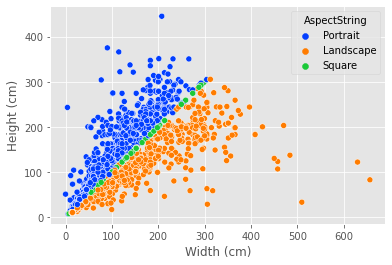

In [18]:
# Create a scatter plot, plotting "Width (cm)" on the
# horizontal axis and "Height (cm)" on the vertical axis
sns.scatterplot(data=small_paintings, x='Width (cm)', y='Height (cm)', hue='AspectString', palette='bright')

#### Altair

Altair is an open-source, declarative visualization library. It is based on the popular JSON-based plotting library Vega-lite and provides a rich API for creating stylized and interactive visualizations. You can learn more and find documentation on the [Altair website](https://altair-viz.github.io/index.html).

In [19]:
# Import the Altair library as alt (callable in our code as alt)
import altair as alt

In [20]:
# Drop rows that do not have a defined aspect ("AspectString" is nan)
small_paintings_drop = small_paintings.dropna(subset=['AspectString'])

alt.Chart(small_paintings_drop).mark_point().encode(
    x='Width (cm)',
    y='Height (cm)',
    color='AspectString',
    tooltip=[
        'Artist',
        'Width (cm)',
        'Height (cm)',
        alt.Tooltip('Aspect', format='.3')
    ]
).interactive()

alt.Chart(...)

## Open work time
You can use this time to ask questions, collaborate, or work on the following activities (on your own or in a group).

All of the following exercises will use a dataset about photos from the MoMA collection. All of the columns are the same as the paintings dataset used above. You can run the first cell below to read in the dataset as a DataFrame.

In [35]:
# URL to the photographs dataset
photos_file_url = 'https://raw.githubusercontent.com/ncsu-libraries-data-vis/teaching-datasets/main/moma_data/moma_photographs_final.csv'

# Import the photographs dataset as a DataFrame
photos = pd.read_csv(photos_file_url)

# Print the first five rows of the photos DataFrame
photos.head()

,Title,Artist,ConstituentID,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,...,ArtistBio,Nationality,Gender,BeginDate,EndDate,Area (cm^2),Aspect,OilPainting,YearCreated,AspectString
0,Untitled from VVV Portfolio,David Hare,2504.0,"c. 1941, published 1943",Gelatin silver print mounted on paper from a p...,"composition: 12 x 9 3/4"" (30.5 x 24.8 cm); she...",The Louis E. Stern Collection,1113.1964.6,Photograph,Drawings & Prints,...,"American, 1917–1992",American,male,1917.0,1992.0,756.4,0.813115,N,1941.0,Portrait
1,Tuileries Sanglier / d'apres l'antique,Eugène Atget,229.0,1911,Albumen silver print,"8 11/16 × 6 9/16"" (22 × 16.7 cm)",Abbott-Levy Collection. Partial gift of Shirle...,1.1969.1,Photograph,Photography,...,"French, 1857–1927",French,male,1857.0,1927.0,NaN,NaN,N,1911.0,NaN
2,Sapin (Trianon),Eugène Atget,229.0,1910-14,Albumen silver print,"Approx. 7 1/8 × 8 5/8"" (18.1 × 21.9 cm)",Abbott-Levy Collection. Partial gift of Shirle...,1.1969.10,Photograph,Photography,...,"French, 1857–1927",French,male,1857.0,1927.0,NaN,NaN,N,1910.0,NaN
3,"Versailles, vase par Ballin",Eugène Atget,229.0,1902,Matte albumen silver print,"Approx. 8 9/16 × 7 1/16"" (21.8 × 18 cm)",Abbott-Levy Collection. Partial gift of Shirle...,1.1969.100,Photograph,Photography,...,"French, 1857–1927",French,male,1857.0,1927.0,NaN,NaN,N,1902.0,NaN
4,Facteur,Eugène Atget,229.0,1899-1900,Gelatin silver printing-out-paper print,"Approx. 8 11/16 × 6 9/16"" (22 × 16.7 cm)",Abbott-Levy Collection. Partial gift of Shirle...,1.1969.1000,Photograph,Photography,...,"French, 1857–1927",French,male,1857.0,1927.0,NaN,NaN,N,1899.0,NaN
